### **Lab Activity 2.1: Exploratory Data Analysis (EDA) and Statistical Visualization of Student Performance Data**

#### **Objective**
The objective of this lab activity is to perform Exploratory Data Analysis (EDA) and statistical visualization on student performance data. The analysis aims to uncover key patterns, correlations, and insights that affect student academic performance.

#### **Dataset Information**
- **Dataset Source:** [UCI Machine Learning Repository - Student Performance](https://archive.ics.uci.edu/ml/datasets/Student+Performance)
- The dataset consists of student records with various attributes such as study time, parental education, and test scores.

#### **Requirements**
- **Python** (latest version recommended)
- **Jupyter Notebook** (or any Python IDE such as PyCharm, VS Code, or Google Colab)
- **Required Python Libraries:**
  - `pandas` (for data handling and manipulation)
  - `numpy` (for numerical computations)
  - `matplotlib` and `seaborn` (for data visualization)

#### **Step 1: Data Collection and Loading**

In [1]:
import pandas as pd

df = pd.read_csv('student-mat.csv', sep=';')  # Adjust delimiter if necessary
print(df.head())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


#### **Step 2: Data Exploration**

In [2]:
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [3]:
print(df.describe())

              age        Medu        Fedu  traveltime   studytime    failures  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    16.696203    2.749367    2.521519    1.448101    2.035443    0.334177   
std      1.276043    1.094735    1.088201    0.697505    0.839240    0.743651   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     3.944304    3.235443    3.108861    1.481013    2.291139    3.554430   
std      0.896659    0.9988

In [4]:
categorical_features = df.select_dtypes(include=['object']).columns
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
print('Categorical Features:', categorical_features)
print('Numerical Features:', numerical_features)

Categorical Features: Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')
Numerical Features: Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3'],
      dtype='object')


#### **Step 3: Data Visualization**

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

Distribution of student grades (G3 - final grade):

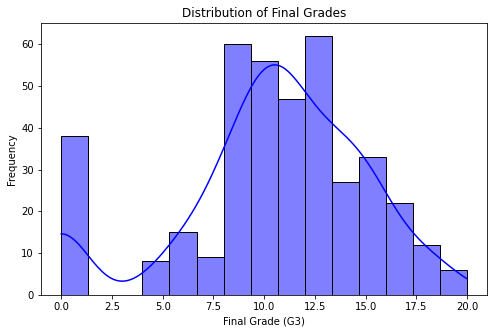

In [6]:
plt.figure(figsize=(8,5))
sns.histplot(df['G3'], bins=15, kde=True, color='blue')
plt.xlabel('Final Grade (G3)')
plt.ylabel('Frequency')
plt.title('Distribution of Final Grades')
plt.show()

Correlation Heatmap:

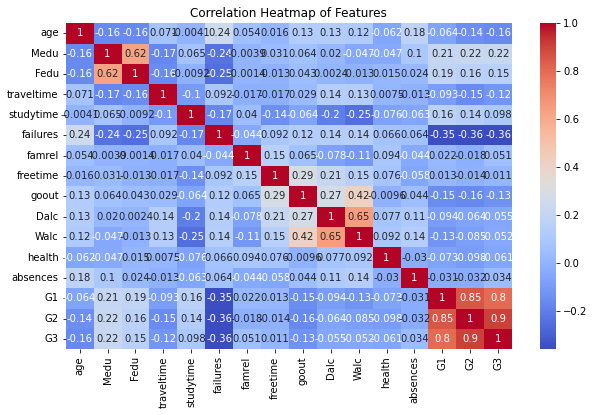

In [7]:
plt.figure(figsize=(10,6))
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])

sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Features")
plt.show()


Impact of Study Time on Final Grade:

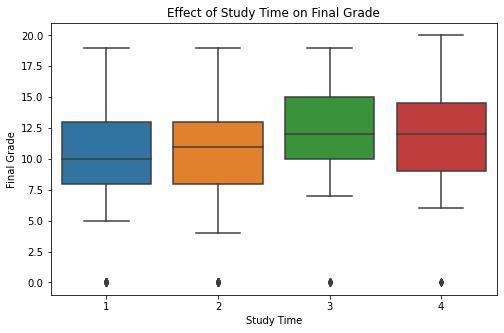

In [8]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['studytime'], y=df['G3'])
plt.xlabel('Study Time')
plt.ylabel('Final Grade')
plt.title('Effect of Study Time on Final Grade')
plt.show()

Parental Education vs. Student Performance:

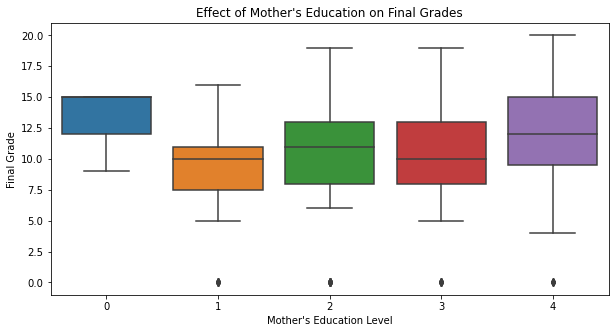

In [9]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['Medu'], y=df['G3'])
plt.xlabel("Mother's Education Level")
plt.ylabel('Final Grade')
plt.title("Effect of Mother's Education on Final Grades")
plt.show()

#### **Step 4: Interpretation and Insights**

Summarize findings from the EDA:

- Identify key factors influencing student performance.
- Analyze the correlation between study time, parental education, and final grades.
- Detect potential outliers and missing values.

Suggest further steps:
- Feature engineering to improve predictive models.
- Exploring machine learning models to predict student performance.